## Analyzing Iowa Liquor Sales with a Focus on Diageo Brands

In this project, we aim to explore and analyze liquor sales data from the state of Iowa. Our primary focus will be on brands under the Diageo portfolio. We'll compare their performance with other brands in the market and derive insights that could help in making informed business decisions.

### Loading Essential Datasets


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iowa_liquor_sales = pd.read_csv('iowa_liquor_new.csv')
present_brands_df = pd.read_csv('present_brands_new.csv')

### Sales Analysis of Diageo Brands in Iowa


In [31]:
# 1. Diageo Brands Analysis

# Filter the iowa_liquor_sales data to retain only Diageo brands
diageo_sales_data = iowa_liquor_sales[iowa_liquor_sales['Item Description'].isin(present_brands_df['Diageo Brands in Iowa Liquor Data'])]

# Aggregate sales data by brand
diageo_sales_by_brand = diageo_sales_data.groupby('Item Description').agg({
    'Sale (Dollars)': 'sum',
    'Volume Sold (Liters)': 'sum'
}).reset_index()

# Sort the brands based on sales
diageo_sales_by_brand_sorted = diageo_sales_by_brand.sort_values(by='Sale (Dollars)', ascending=False)

# Display top 10 Diageo brands by sales
diageo_sales_by_brand_sorted.head(10)

,Item Description,Sale (Dollars),Volume Sold (Liters)
80,CROWN ROYAL,3044413.52,101841.67
100,CROWN ROYAL REGAL APPLE,2348013.91,76790.41
35,CAPTAIN MORGAN ORIGINAL SPICED,2286743.53,132211.15
144,HENNESSY VS,2223880.15,51914.16
62,CAPTAIN MORGAN SPICED RUM,1217348.77,71122.27
215,SMIRNOFF 80PRF,1052833.75,67361.05
36,CAPTAIN MORGAN ORIGINAL SPICED BARREL,888840.00,57610.00
278,TANQUERAY GIN,751082.66,31620.61
211,RUMPLE MINZE PEPPERMINT SCHNAPPS LIQUEUR,519382.76,21359.38
220,SMIRNOFF 80PRF PET,511778.42,38127.50


### Top 10 Diageo Brands by Sales and Volume


In [32]:
# Filter the iowa_liquor_sales data to retain only the top Diageo brands
top_diageo_brands = ['CROWN ROYAL', 'CROWN ROYAL REGAL APPLE', 'CAPTAIN MORGAN ORIGINAL SPICED', 
                     'HENNESSY VS', 'CAPTAIN MORGAN SPICED RUM', 'SMIRNOFF 80PRF', 
                     'CAPTAIN MORGAN ORIGINAL SPICED BARREL', 'TANQUERAY GIN', 
                     'RUMPLE MINZE PEPPERMINT SCHNAPPS LIQUEUR', 'SMIRNOFF 80PRF PET']

top_diageo_sales_data = iowa_liquor_sales[iowa_liquor_sales['Item Description'].isin(top_diageo_brands)]

# Aggregate sales data by category for the top Diageo brands
top_diageo_sales_by_category = top_diageo_sales_data.groupby('Category Name').agg({
    'Sale (Dollars)': 'sum',
    'Volume Sold (Liters)': 'sum'
}).reset_index()

# Sort by sales
top_diageo_sales_by_category_sorted = top_diageo_sales_by_category.sort_values(by='Sale (Dollars)', ascending=False)

# Display top categories for Diageo brands
print(top_diageo_sales_by_category_sorted)


       Category Name  Sale (Dollars)  Volume Sold (Liters)
1  CANADIAN WHISKIES      5392427.43             178632.08
5         SPICED RUM      4392932.30             260943.42
2  IMPORTED BRANDIES      2223880.15              51914.16
0    AMERICAN VODKAS      1564612.17             105488.55
3  IMPORTED DRY GINS       751082.66              31620.61
4  IMPORTED SCHNAPPS       519382.76              21359.38


### Sales and Volume Breakdown by Category for Top Non-Diageo Brands


In [33]:
# Filter the iowa_liquor_sales data to exclude the top Diageo brands
non_diageo_sales_data = iowa_liquor_sales[~iowa_liquor_sales['Item Description'].isin(top_diageo_brands)]

# Aggregate sales data by category for non-Diageo brands
non_diageo_sales_by_category = non_diageo_sales_data.groupby('Category Name').agg({
    'Sale (Dollars)': 'sum',
    'Volume Sold (Liters)': 'sum'
}).reset_index()

# Filter to get sales data only for the top categories from the Diageo brands analysis
non_diageo_sales_top_categories = non_diageo_sales_by_category[non_diageo_sales_by_category['Category Name'].isin(top_diageo_sales_by_category_sorted['Category Name'])]

# Sort by sales
non_diageo_sales_top_categories_sorted = non_diageo_sales_top_categories.sort_values(by='Sale (Dollars)', ascending=False)

# Display sales data for the top categories for non-Diageo brands
print(non_diageo_sales_top_categories_sorted)


        Category Name  Sale (Dollars)  Volume Sold (Liters)
9     AMERICAN VODKAS     15494936.13            1569943.74
13  CANADIAN WHISKIES      8364678.17             742255.84
43         SPICED RUM      2684157.04             196801.22
23  IMPORTED BRANDIES      2014444.90              41756.62
29  IMPORTED SCHNAPPS      1162032.49              66684.40
26  IMPORTED DRY GINS       847094.51              31758.73


# Sales and Volume Comparison: Diageo Brands vs. Non-Diageo Brands by Top Categories

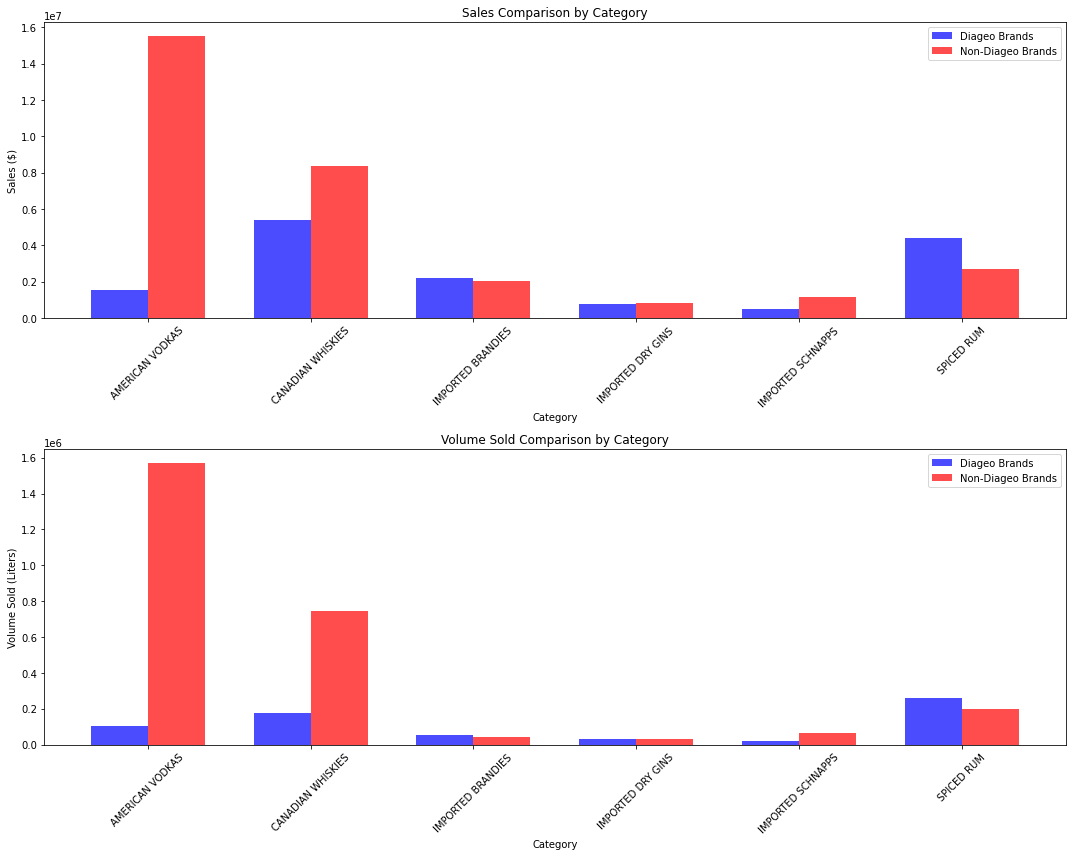

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the categories based on the top categories for Diageo sales
categories = top_diageo_sales_by_category['Category Name'].tolist()

# Extracting sales and volume values for both Diageo and non-Diageo brands
diageo_sales_values = top_diageo_sales_by_category['Sale (Dollars)'].tolist()
non_diageo_sales_values = non_diageo_sales_top_categories['Sale (Dollars)'].tolist()

diageo_volume_values = top_diageo_sales_by_category['Volume Sold (Liters)'].tolist()
non_diageo_volume_values = non_diageo_sales_top_categories['Volume Sold (Liters)'].tolist()

# Plotting
plt.figure(figsize=(15, 12))

# Sales bar plot
plt.subplot(2, 1, 1)
bar_width = 0.35
index = np.arange(len(categories))
bar1 = plt.bar(index, diageo_sales_values, bar_width, label='Diageo Brands', color='b', alpha=0.7)
bar2 = plt.bar(index + bar_width, non_diageo_sales_values, bar_width, label='Non-Diageo Brands', color='r', alpha=0.7)

plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.title('Sales Comparison by Category')
plt.xticks(index + bar_width / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()

# Volume bar plot
plt.subplot(2, 1, 2)
bar1 = plt.bar(index, diageo_volume_values, bar_width, label='Diageo Brands', color='b', alpha=0.7)
bar2 = plt.bar(index + bar_width, non_diageo_volume_values, bar_width, label='Non-Diageo Brands', color='r', alpha=0.7)

plt.xlabel('Category')
plt.ylabel('Volume Sold (Liters)')
plt.title('Volume Sold Comparison by Category')
plt.xticks(index + bar_width / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


## Identifying and Comparing Top 5 Products by Sales for Each Category: Diageo vs. Non-Diageo Brands

In [35]:
diageo_sales_in_iowa = iowa_liquor_sales[iowa_liquor_sales['Item Description'].isin(present_brands_df['Diageo Brands in Iowa Liquor Data'])]


# Extracting top 5 Diageo products by sales for each category
top_diageo_products_by_category = diageo_sales_in_iowa.groupby(['Category Name', 'Item Description']).agg({
    'Sale (Dollars)': 'sum'
}).reset_index()

# Filtering only the top categories
top_diageo_products_by_category = top_diageo_products_by_category[
    top_diageo_products_by_category['Category Name'].isin(categories)
]

# Sorting and picking top 5 products for each category
top_diageo_products_by_category = top_diageo_products_by_category.sort_values(['Category Name', 'Sale (Dollars)'], ascending=[True, False])
top_5_diageo_products_by_category = top_diageo_products_by_category.groupby('Category Name').head(5)

# Extracting top 5 non-Diageo products by sales for each category
non_diageo_sales_data = iowa_liquor_sales[~iowa_liquor_sales['Item Description'].isin(present_brands_df['Diageo Brands in Iowa Liquor Data'])]
top_non_diageo_products_by_category = non_diageo_sales_data.groupby(['Category Name', 'Item Description']).agg({
    'Sale (Dollars)': 'sum'
}).reset_index()

# Filtering only the top categories
top_non_diageo_products_by_category = top_non_diageo_products_by_category[
    top_non_diageo_products_by_category['Category Name'].isin(categories)
]

# Sorting and picking top 5 products for each category
top_non_diageo_products_by_category = top_non_diageo_products_by_category.sort_values(['Category Name', 'Sale (Dollars)'], ascending=[True, False])
top_5_non_diageo_products_by_category = top_non_diageo_products_by_category.groupby('Category Name').head(5)


## Visualizing Top 5 Products by Sales in Each Category: Side-by-Side Comparison of Diageo vs. Non-Diageo Brands


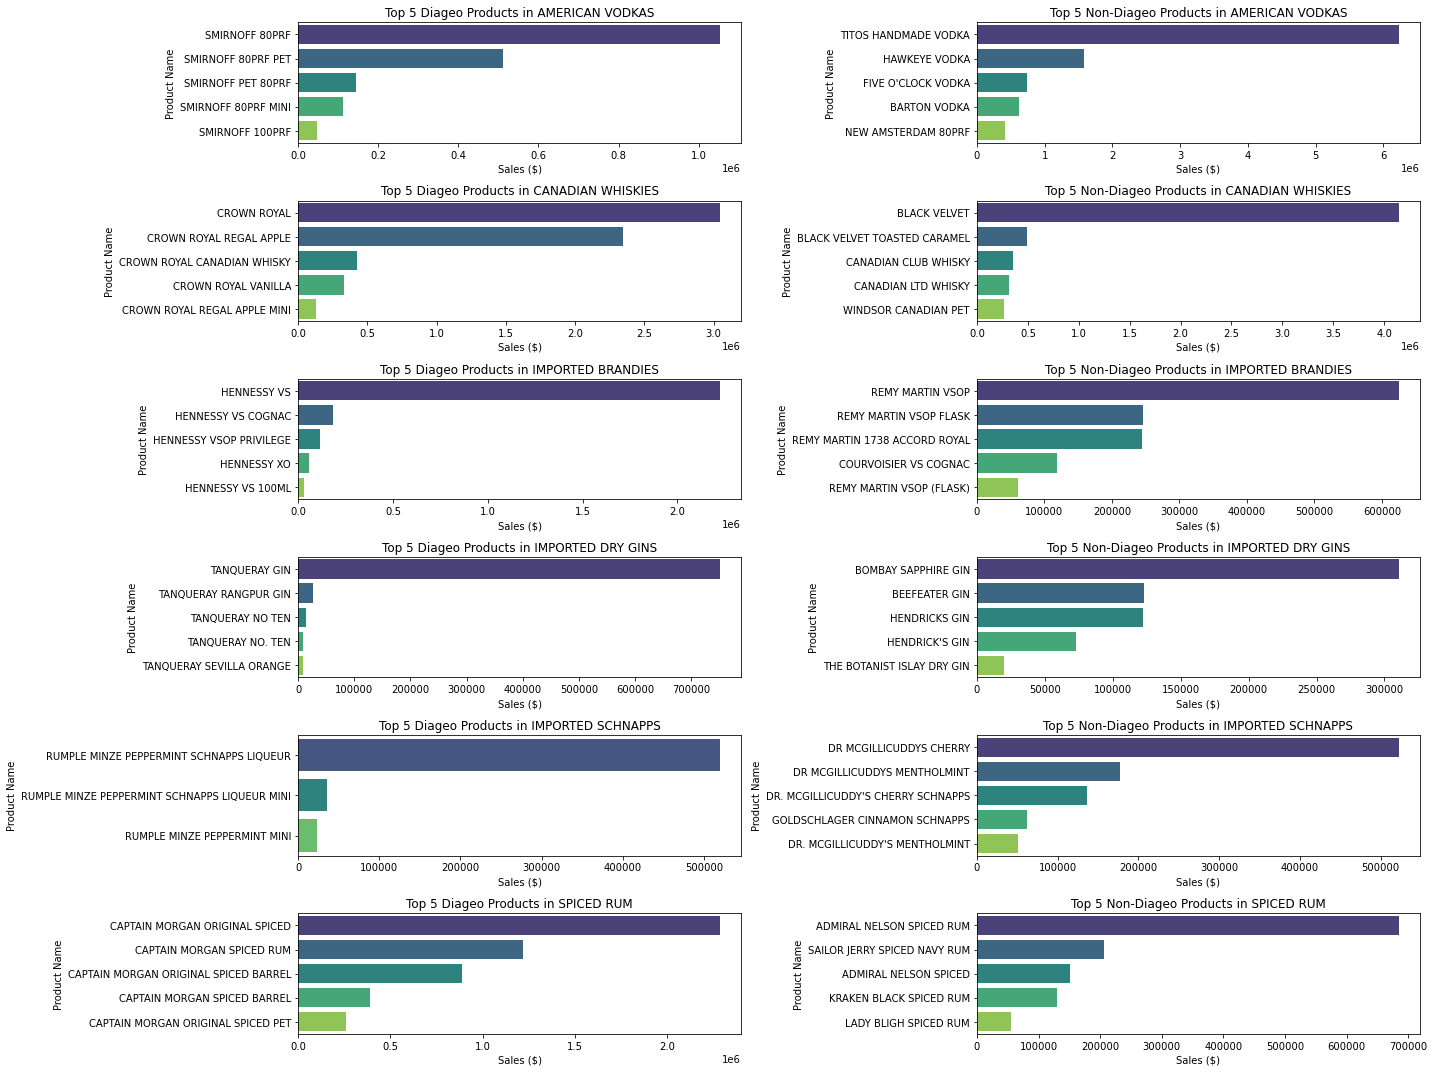

In [36]:
# Plotting the top 5 Diageo products for each category
plt.figure(figsize=(20, 15))

for index, category in enumerate(categories, 1):
    plt.subplot(len(categories), 2, index*2-1)
    data = top_5_diageo_products_by_category[top_5_diageo_products_by_category['Category Name'] == category]
    sns.barplot(data=data, y='Item Description', x='Sale (Dollars)', palette='viridis')
    plt.title(f'Top 5 Diageo Products in {category}')
    plt.xlabel('Sales ($)')
    plt.ylabel('Product Name')

# Plotting the top 5 non-Diageo products for each category
for index, category in enumerate(categories, 1):
    plt.subplot(len(categories), 2, index*2)
    data = top_5_non_diageo_products_by_category[top_5_non_diageo_products_by_category['Category Name'] == category]
    sns.barplot(data=data, y='Item Description', x='Sale (Dollars)', palette='viridis')
    plt.title(f'Top 5 Non-Diageo Products in {category}')
    plt.xlabel('Sales ($)')
    plt.ylabel('Product Name')

plt.tight_layout()
plt.show()

# Further Analysis

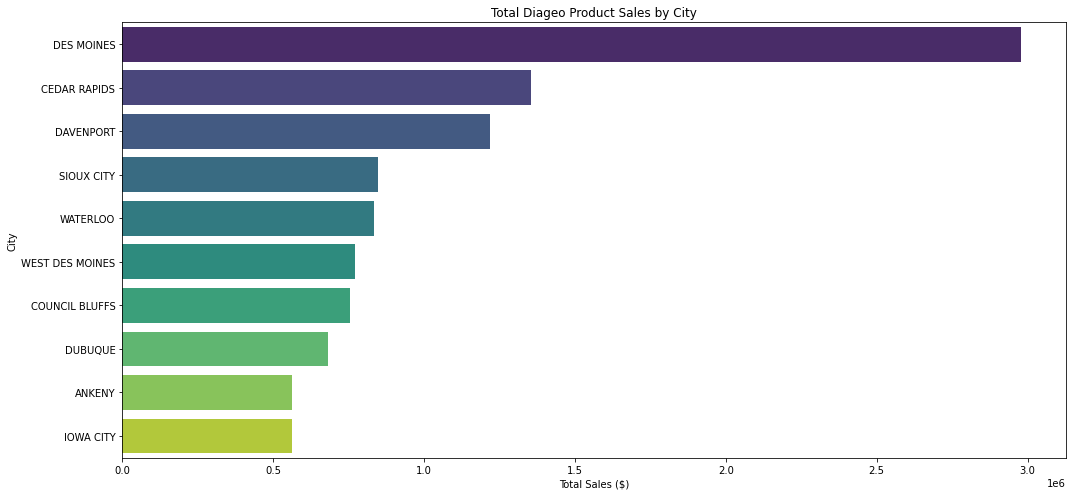

In [46]:
# Aggregate the total sales of Diageo products by city
total_diageo_sales_by_city = diageo_sales_data.groupby('City').agg({
    'Sale (Dollars)': 'sum'
}).reset_index().sort_values(by="Sale (Dollars)", ascending=False).head(10)  # Top 10 cities by sales

# Plotting total Diageo sales by city
plt.figure(figsize=(15, 7))
sns.barplot(x="Sale (Dollars)", y="City", data=total_diageo_sales_by_city, palette="viridis")
plt.title("Total Diageo Product Sales by City")
plt.xlabel('Total Sales ($)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


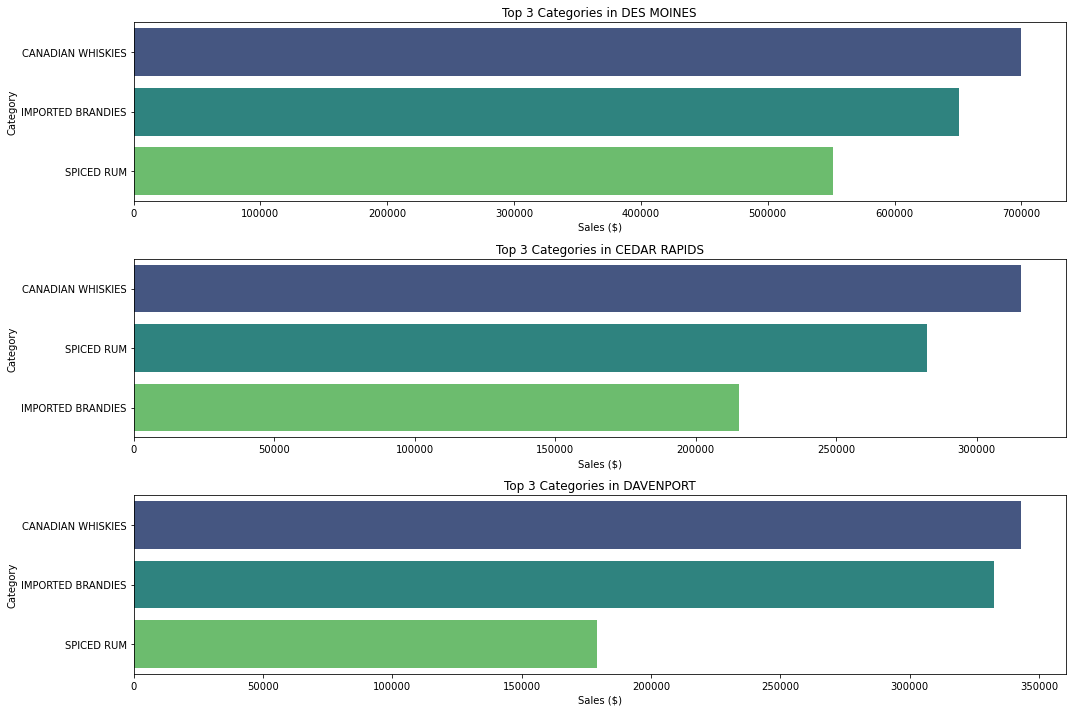

In [47]:
# Identifying top 3 cities
top_3_cities = total_diageo_sales_by_city['City'].head(3).tolist()

# Filtering Diageo sales data for these cities
diageo_top_3_cities_data = diageo_sales_data[diageo_sales_data['City'].isin(top_3_cities)]

# Grouping by City and Category to get sales
diageo_sales_by_city_category = diageo_top_3_cities_data.groupby(['City', 'Category Name']).agg({
    'Sale (Dollars)': 'sum'
}).reset_index()

# Extracting top 3 categories for each city
top_3_categories_by_city = diageo_sales_by_city_category.groupby('City').apply(lambda x: x.nlargest(3, 'Sale (Dollars)')).reset_index(drop=True)

# Plotting the results
plt.figure(figsize=(15, 10))

for idx, city in enumerate(top_3_cities, 1):
    city_data = top_3_categories_by_city[top_3_categories_by_city['City'] == city]
    
    plt.subplot(3, 1, idx)
    sns.barplot(x="Sale (Dollars)", y="Category Name", data=city_data, palette="viridis")
    plt.title(f"Top 3 Categories in {city}")
    plt.xlabel('Sales ($)')
    plt.ylabel('Category')

plt.tight_layout()
plt.show()


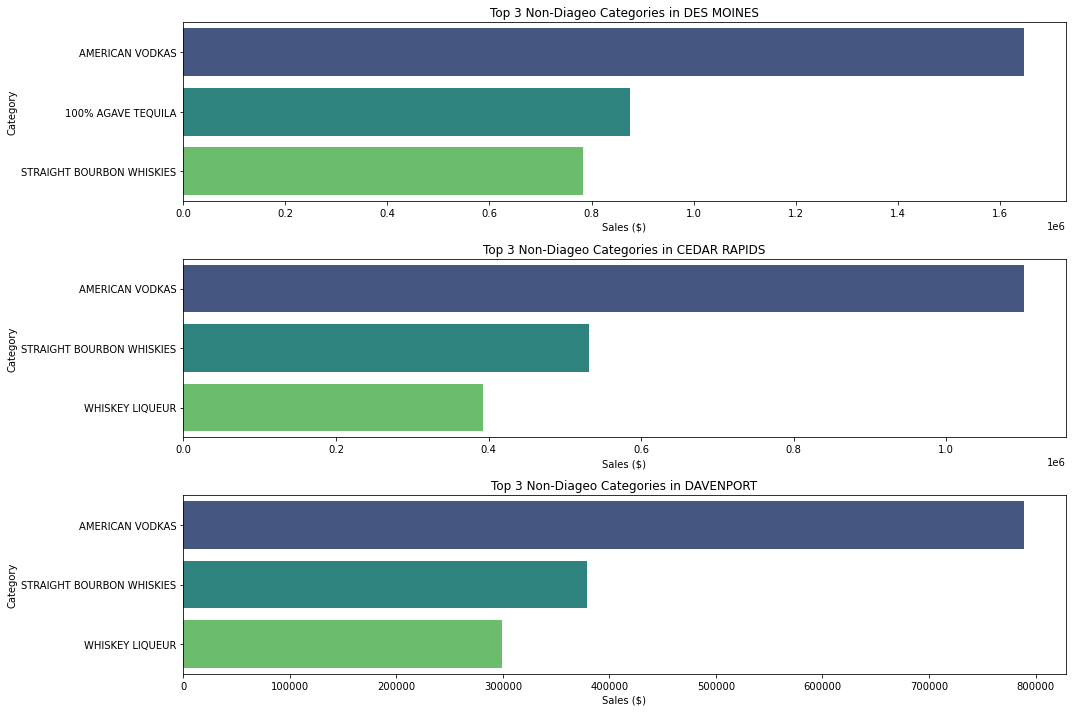

In [48]:
# Filtering non-Diageo sales data for the top 3 cities
non_diageo_top_3_cities_data = non_diageo_sales_data[non_diageo_sales_data['City'].isin(top_3_cities)]

# Grouping by City and Category to get sales
non_diageo_sales_by_city_category = non_diageo_top_3_cities_data.groupby(['City', 'Category Name']).agg({
    'Sale (Dollars)': 'sum'
}).reset_index()

# Extracting top 3 categories for each city
top_3_categories_non_diageo_by_city = non_diageo_sales_by_city_category.groupby('City').apply(lambda x: x.nlargest(3, 'Sale (Dollars)')).reset_index(drop=True)

# Plotting the results
plt.figure(figsize=(15, 10))

for idx, city in enumerate(top_3_cities, 1):
    city_data = top_3_categories_non_diageo_by_city[top_3_categories_non_diageo_by_city['City'] == city]
    
    plt.subplot(3, 1, idx)
    sns.barplot(x="Sale (Dollars)", y="Category Name", data=city_data, palette="viridis")
    plt.title(f"Top 3 Non-Diageo Categories in {city}")
    plt.xlabel('Sales ($)')
    plt.ylabel('Category')

plt.tight_layout()
plt.show()


In [49]:
# 1. Aggregate the total sales of Diageo products by city
total_diageo_sales_by_city = diageo_sales_data.groupby('City').agg({
    'Sale (Dollars)': 'sum'
}).reset_index().sort_values(by="Sale (Dollars)", ascending=False).head(10)  # Top 10 cities by sales

# 2. Identifying top 3 cities
top_3_cities = total_diageo_sales_by_city['City'].head(3).tolist()

# 3. Grouping by City and Category to get sales for Diageo brands
diageo_sales_by_city_category = diageo_sales_data[diageo_sales_data['City'].isin(top_3_cities)].groupby(['City', 'Category Name']).agg({
    'Sale (Dollars)': 'sum'
}).reset_index()

# 4. Extracting top 3 categories for each city for Diageo brands
top_3_categories_diageo_by_city = diageo_sales_by_city_category.groupby('City').apply(lambda x: x.nlargest(3, 'Sale (Dollars)')).reset_index(drop=True)

# 3. Grouping by City and Category to get sales for non-Diageo brands
non_diageo_sales_by_city_category = non_diageo_sales_data[non_diageo_sales_data['City'].isin(top_3_cities)].groupby(['City', 'Category Name']).agg({
    'Sale (Dollars)': 'sum'
}).reset_index()

# 4. Extracting top 3 categories for each city for non-Diageo brands
top_3_categories_non_diageo_by_city = non_diageo_sales_by_city_category.groupby('City').apply(lambda x: x.nlargest(3, 'Sale (Dollars)')).reset_index(drop=True)

top_3_categories_diageo_by_city, top_3_categories_non_diageo_by_city


(           City      Category Name  Sale (Dollars)
 0  CEDAR RAPIDS  CANADIAN WHISKIES       315876.52
 1  CEDAR RAPIDS         SPICED RUM       282195.91
 2  CEDAR RAPIDS  IMPORTED BRANDIES       215384.64
 3     DAVENPORT  CANADIAN WHISKIES       343143.83
 4     DAVENPORT  IMPORTED BRANDIES       332570.88
 5     DAVENPORT         SPICED RUM       179224.12
 6    DES MOINES  CANADIAN WHISKIES       699855.17
 7    DES MOINES  IMPORTED BRANDIES       650592.53
 8    DES MOINES         SPICED RUM       551653.36,
            City              Category Name  Sale (Dollars)
 0  CEDAR RAPIDS            AMERICAN VODKAS      1101318.12
 1  CEDAR RAPIDS  STRAIGHT BOURBON WHISKIES       532323.50
 2  CEDAR RAPIDS            WHISKEY LIQUEUR       393089.35
 3     DAVENPORT            AMERICAN VODKAS       788809.73
 4     DAVENPORT  STRAIGHT BOURBON WHISKIES       379045.41
 5     DAVENPORT            WHISKEY LIQUEUR       299004.60
 6    DES MOINES            AMERICAN VODKAS      1646835.66